In [5]:
## IMPORTS
import pandas as pd
import config
import config_func
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


In [6]:
## CONFIG VARIABLES
## FILES
INPUT_FOLDER = 'input'
IMAGES_ACESS = 'images/*.jpg'
INFO_PATIENTS = 'HAM10000_metadata.csv'
PIXEL_28_RGB_CSV = 'HMNIST_28_28_RGB.csv'

#DATAFRAME COLUMNS
LESION_ID = 'lesion_id'
IMAGE_ID = 'image_id'
DX = 'dx'
DX_TYPE = 'dx_type'
AGE = 'age'
SEX = 'sex'
LOCALIZATION = 'localization'
PATH = 'path'

#OTHER VARIABLES
MALE = 'male'
FEMALE = 'female'
UNKNOWN = 'unknown'
SCALP = 'scalp'
EAR = 'ear'
FACE = 'face'
BACK = 'back'
TRUNK = 'trunk'
CHEST = 'chest'
UPPER_EXTREMEMITY = 'upper_extremity'
ABDOMEN = 'abdomen'
LOWER_EXTREMITY = 'lower_extremity'
GENITAL = 'genital'
NECK = 'neck'
HAND = 'hand'
FOOT = 'foot'
ACRAL = 'acral'
BKL = 'bkl'
NV = 'nv'
DF = 'df'
MEL = 'mel'
VASC = 'vasc'
BCC = 'bcc'
AKIEC = 'akiec'


In [7]:
## IMPORTANT PATH FOLDERS, THAT AGGREGATES DATASET INFORMATION
ROOT_DIR = os.getcwd()
print(ROOT_DIR)
INPUT_DIR = os.path.join(ROOT_DIR, config.INPUT_FOLDER)
print(INPUT_DIR)
PATIENTS_INFO = os.path.join(INPUT_DIR, config.INFO_PATIENTS)
print(PATIENTS_INFO)


C:\Users\gusta\Desktop\Projetos_Python\skin_mnist
C:\Users\gusta\Desktop\Projetos_Python\skin_mnist\input
C:\Users\gusta\Desktop\Projetos_Python\skin_mnist\input\HAM10000_metadata.csv


In [8]:
## GET PATHS FOR ALL IMAGES
IMAGES_REGEX = os.path.join(INPUT_DIR, config.IMAGES_ACESS)
images_paths = config_func.getImages(IMAGES_REGEX)
images_paths[0]


'C:\\Users\\gusta\\Desktop\\Projetos_Python\\skin_mnist\\input\\images\\ISIC_0024306.jpg'

In [9]:
##GET DATA
data = pd.read_csv(PATIENTS_INFO)
data.iloc[0] #SEE OUTPUT OF FIRST ROW, TO CHECK AFTER IF NEW DATAFRAME IS ALREADY WELL CREATED
data.head(5)


,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [10]:
## DATAFRAME INFO
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [11]:
##SORT BY IMAGE_ID, IN COHERENCE IMAGE_PATHS
data = data.sort_values(config.IMAGE_ID, ascending=True)
data.head(5)


,lesion_id,image_id,dx,dx_type,age,sex,localization
4349,HAM_0000550,ISIC_0024306,nv,follow_up,45.0,male,trunk
4263,HAM_0003577,ISIC_0024307,nv,follow_up,50.0,male,lower extremity
4217,HAM_0001477,ISIC_0024308,nv,follow_up,55.0,female,trunk
3587,HAM_0000484,ISIC_0024309,nv,follow_up,40.0,male,trunk
1451,HAM_0003350,ISIC_0024310,mel,histo,60.0,male,chest


In [9]:
def addNewColumn_Populate_DataFrame(dataFrame, name_new_column, dataToPopulate):

    '''
    THIS FUNCTION IS USED TO ADD NEW COLUMN TO DATAFRAME, AND POPULATE COLUMN WITH DATA
    :param dataFrame: dataFrame --> dataFrame to apply changes
    :param name_new_column: str --> name of new column
    :param dataToPopulate: List (str) --> strings to populate data
    :return: dataFrame changed
    '''

    try:

        dataFrame[name_new_column] = dataToPopulate
        return dataFrame

    except:
        raise


In [10]:
## SET NEW COLUMN TO DATAFRAME AND IMAGE PATH TO SORTED DATAFRAME (SAME ORDER DATAFRAME AND LIST OF IMAGE_PATHS) 
data = config_func.addNewColumn_Populate_DataFrame(data, config.PATH, images_paths)
data = data.sort_index() #sort by index again
data.head(5)
data.iloc[0][config.PATH]


'C:\\Users\\gusta\\Desktop\\Projetos_Python\\skin_mnist\\input\\images\\ISIC_0027419.jpg'

In [11]:
## COUNT HOW MANY IMAGES ARE INTO DATASET
data.shape[0]


10015

In [12]:
## GET COLUMNS NAMES
data.columns


Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization',
       'path'],
      dtype='object')

In [13]:
## CHECK HOW MANY CLASSES EXIST
classes = data.dx.unique()
classes

array(['nv', 'mel', 'bkl', 'df', 'akiec', 'bcc', 'vasc'], dtype=object)

In [14]:
## CHECK NULL VALUES BY COLUMN
data.isnull().sum()


lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

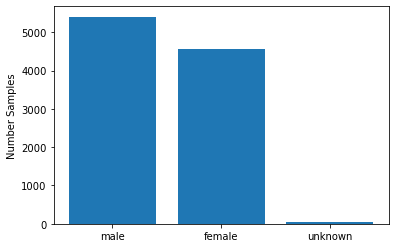

In [15]:
## HISTOGRAM WITH SEX DISTRIBUTION
bar_names = data.sex.unique()
y_pos = np.arange(len(bar_names))
samples_total = [data.loc[data.sex == MALE, SEX].count(), 
                 data.loc[data.sex == FEMALE, SEX].count(),
                 data.loc[data.sex == UNKNOWN, SEX].count()]
plt.bar(y_pos, samples_total, align='center')
plt.xticks(y_pos, bar_names)
plt.ylabel('Number Samples')
plt.show()


In [16]:
## HISTOGRAM WITH LOCALIZATION DISTRIBUTION
local_occurences = data.localization.unique()
local_occurences

array(['trunk', 'lower extremity', 'chest', 'back', 'abdomen', 'foot',
       'unknown', 'face', 'upper extremity', 'neck', 'scalp', 'genital',
       'hand', 'ear', 'acral'], dtype=object)

In [17]:
## DESCRIPTION OF AGE
data[AGE].describe()


count    9958.000000
mean       51.863828
std        16.968614
min         0.000000
25%        40.000000
50%        50.000000
75%        65.000000
max        85.000000
Name: age, dtype: float64

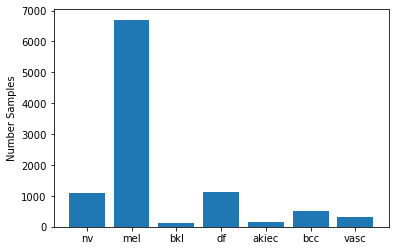

In [18]:
## DISTRIBUTION NUMBER EXAMPLES PER CLASS
y_pos = np.arange(len(classes))
samples_total = [data.loc[data.dx == BKL, DX].count(), 
                 data.loc[data.dx == NV, DX].count(),
                 data.loc[data.dx == DF, DX].count(),
                 data.loc[data.dx == MEL, DX].count(),
                 data.loc[data.dx == VASC, DX].count(),
                 data.loc[data.dx == BCC, DX].count(),
                 data.loc[data.dx == AKIEC, DX].count()]
plt.bar(y_pos, samples_total, align='center')
plt.xticks(y_pos, classes)
plt.ylabel('Number Samples')
plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000209B5C096A0>,
      dtype=object)

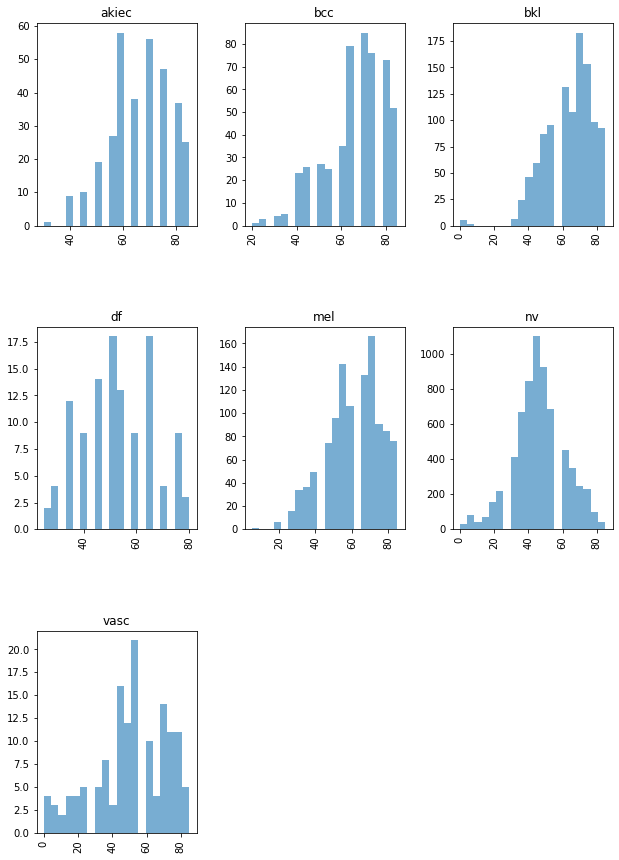

In [19]:
## CHECK DISTRIBUTION OF CLASSES BY AGE
data[AGE].hist(by=data[DX], bins=20, alpha=0.6, figsize=(10, 15))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000209B5F610F0>,
      dtype=object)

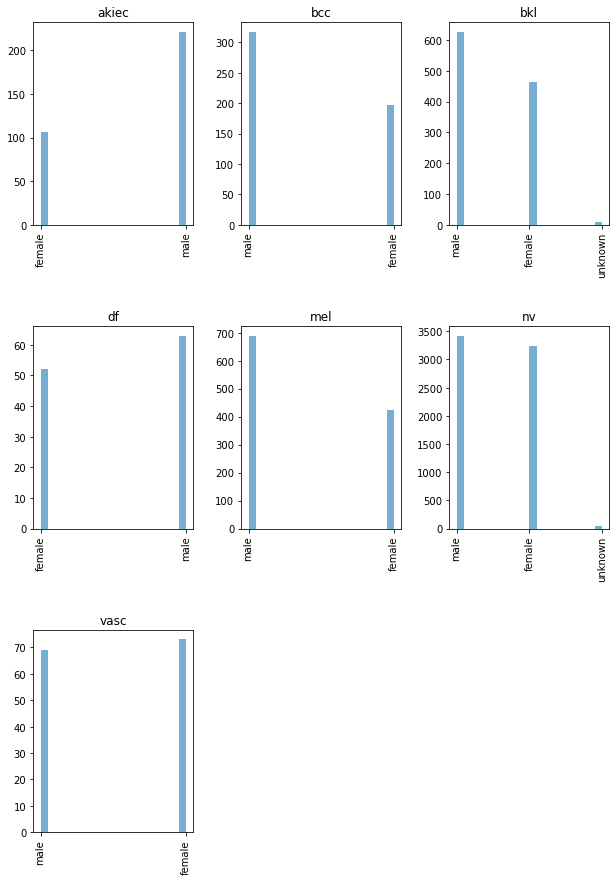

In [20]:
## CHECK DISTRIBUTION OF CLASSES BY SEX
data[SEX].hist(by=data[DX], bins=20, alpha=0.6, figsize=(10, 15))


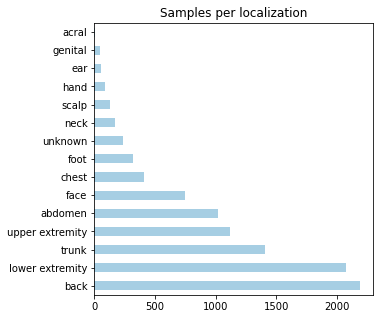

In [21]:
## CHECK WHAT ARE THE MOST BODY AFFECTED AREAS
data[LOCALIZATION].value_counts().plot(kind='barh', figsize=(5, 5), colormap='Paired',
                                        title='Samples per localization')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000209B75C94E0>,
      dtype=object)

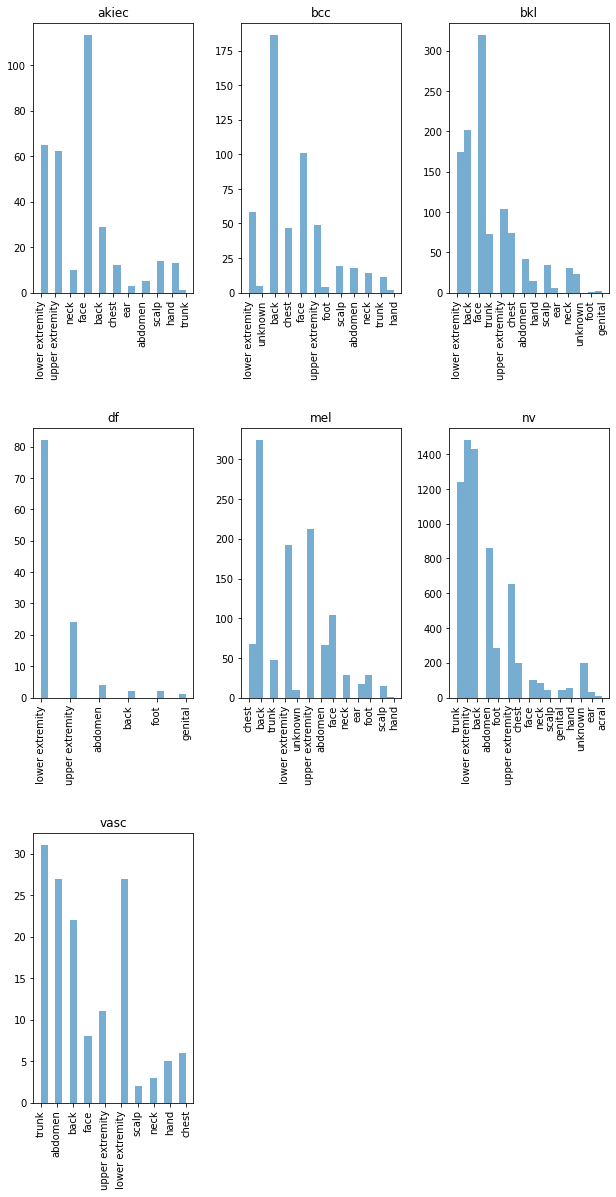

In [22]:
## AFFECTED BODY AREAS BY CLASS
data[LOCALIZATION].hist(by=data[DX], bins=20, alpha=0.6, figsize=(10, 20))


In [23]:
## ACESS IMAGE PIXELS DATAFRAME
PIXELS_PATH = os.path.join(INPUT_DIR, PIXEL_28_RGB_CSV)
pixel_data = pd.read_csv(PIXELS_PATH)


In [24]:
## CHECK SHAPE OF DATAFRAME
pixel_data.shape


(10015, 2353)

In [25]:
## FIRST FIVE LINES OF DATAFRAME
pixel_data.head(5)


,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [26]:
## SHUFFLE ROWS
## NO RESET INDEX, BECAUSE IT'S NOT IMPORTANT IN THIS ANALYSIS
pixel_data = pixel_data.sample(n=len(pixel_data), random_state=42)    
pixel_data.head(5)


,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
1617,158,80,110,154,67,98,166,81,119,181,...,160,83,113,153,85,113,142,80,106,6
8128,214,167,173,215,165,169,217,166,167,218,...,219,151,151,217,148,141,214,147,140,4
2168,206,127,123,209,129,122,215,144,143,220,...,223,164,151,219,153,136,216,148,133,6
1090,205,152,161,210,156,166,214,159,168,214,...,199,157,159,197,154,157,194,152,155,2
7754,123,97,103,137,108,114,136,103,104,145,...,145,122,129,138,116,120,131,109,110,4


In [42]:
## EXAMPLE OF THREE IMAGES BY CLASSES --> USING 28*28 PIXEL RGB CSV DILE
def getImagesByClass(target, numberImages):
    images = []
    for i in range(pixel_data.shape[0]):
        if pixel_data.label.iat[i] == target:
            images.append(pixel_data.iloc[i, :-1].values)
        if len(images) == numberImages:
            break
    return images

images_by_classes = []
for i in range(len(pixel_data.label.unique())):
    images_by_classes.append(getImagesByClass(i,3))
images_by_classes


[[array([155, 111, 116, ..., 110,  59,  70], dtype=int64),
  array([209, 185, 184, ..., 161, 140, 131], dtype=int64),
  array([202, 135, 160, ..., 192, 146, 157], dtype=int64)],
 [array([180, 148, 152, ..., 191, 157, 155], dtype=int64),
  array([56, 41, 31, ..., 10,  7,  7], dtype=int64),
  array([81, 54, 68, ...,  8,  4, 10], dtype=int64)],
 [array([205, 152, 161, ..., 194, 152, 155], dtype=int64),
  array([186, 144, 152, ..., 185, 149, 153], dtype=int64),
  array([154, 131, 139, ..., 169, 148, 149], dtype=int64)],
 [array([246, 191, 182, ..., 226, 180, 167], dtype=int64),
  array([194, 143, 153, ..., 184, 133, 131], dtype=int64),
  array([176, 145, 138, ..., 150, 111, 107], dtype=int64)],
 [array([214, 167, 173, ..., 214, 147, 140], dtype=int64),
  array([123,  97, 103, ..., 131, 109, 110], dtype=int64),
  array([185, 136, 113, ..., 211, 162, 143], dtype=int64)],
 [array([147, 118, 127, ...,  73,  56,  56], dtype=int64),
  array([187, 126, 119, ..., 193, 152, 169], dtype=int64),
  ar

In [43]:
## RESIZE DATA FROM (DIMENSIONS, ) TO (WIDTH, HEIGHT, CHANNELS)
images_by_classes = np.array(images_by_classes)
images_by_classes = np.reshape(images_by_classes, (images_by_classes.shape[0],
                                                   images_by_classes.shape[1],
                                                   28, 28, 3))

In [44]:
images_by_classes.shape


(7, 3, 28, 28, 3)

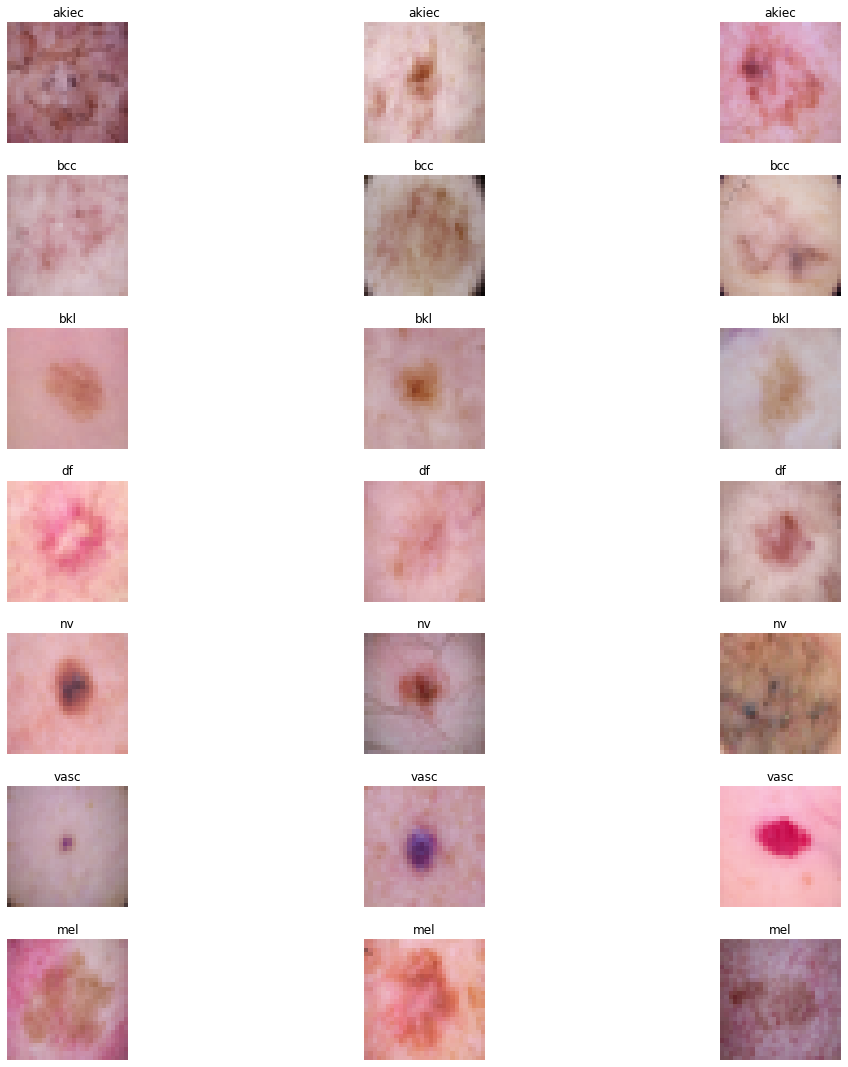

In [57]:
## PLOT 3 IMAGES BY EACH CLASS
f, axr = plt.subplots(7,3, figsize=(15,15))
f.tight_layout()
title = ['akiec', 'bcc', 'bkl', 'df', 'nv', 'vasc', 'mel']
for i in range(7):
    for j in range(3):
        axr[i,j].set_axis_off()
        axr[i,j].imshow(images_by_classes[i][j])
        axr[i,j].set_title(title[i])
#plt.show()